### Linear Regression

_Burton Rosenberg, 26 May 2022_


In [1]:
import pandas as pd
import numpy as np

fish = pd.read_csv('./Fish.csv')
print(fish)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [2]:
f_gb = fish.groupby('Species')
perch_df = f_gb.get_group('Perch')
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [11]:
def pearson_r(data_frame,col1,col2):
    col1_0 = data_frame[col1]-np.mean(data_frame[col1])
    col2_0 = data_frame[col2]-np.mean(data_frame[col2])
    dot = np.sum(col1_0*col2_0)
    covar = dot/len(col1_0)
    return covar/(np.std(col1_0)*np.std(col2_0))

p_r = pearson_r(perch_df,'Height','Weight')
print(f'pearson-r Height vs Weight = {p_r}')

m = p_r * np.std(perch_df['Height'])/np.std(perch_df['Weight'])
b = np.mean(perch_df['Height']) - m * np.mean(perch_df['Weight'])

print(f'm = {m:.6f}, b = {b:.6f}')



pearson-r Height vs Weight = 0.9684406904743864
m = 0.008018, b = 4.796916


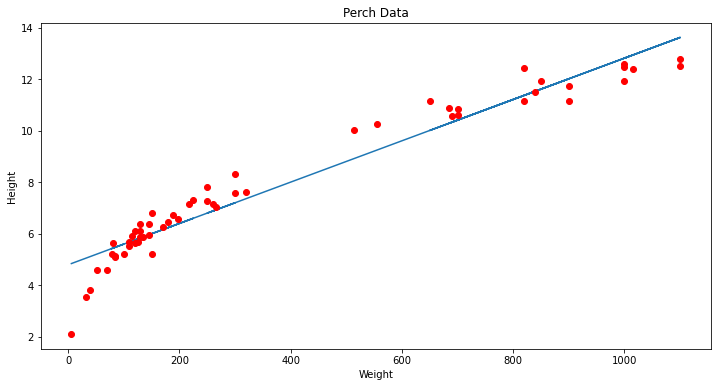

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 6))

plt.plot(perch_df['Weight'], perch_df['Weight']*m+b)     # regression line
plt.plot(perch_df['Weight'], perch_df['Height'], 'ro')   # scatter plot showing actual data
plt.title('Perch Data')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.show()

### Exercise

